# load events as patches

In [62]:
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
from aprovhots import split2patches, get_labels_indices, get_isi, fit_MLR
path = '/home/INT/grimaldi.a/Documents/projets/WP3/2021-12-06_simulator_data/'
%cd $path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/INT/grimaldi.a/Documents/projets/WP3/2021-12-06_simulator_data


In [63]:
patch_size = 5
split2patches(path, patch_size)

list of all files : 
 ['only_sea_session_2.npy', 'only_sea_session_2_patches_5.npy', 'mixed_session_2.npy', 'only_ground_session_1_patches_5.npy', 'mixed_session_2_patches_5.npy', 'only_sea_session_3.npy', 'only_sea_session_1_patches_5.npy', 'mixed_session_3_patches_5.npy', 'mixed_session_1.npy', 'mixed_session_1_patches_5.npy', 'only_ground_session_1.npy', 'only_sea_session_3_patches_5.npy', 'only_sea_session_1.npy', 'mixed_session_3.npy'] 

only_sea_session_2.npy was already divided into patches
only_sea_session_2_patches_5.npy was already divided into patches
mixed_session_2.npy was already divided into patches
only_ground_session_1_patches_5.npy was already divided into patches
mixed_session_2_patches_5.npy was already divided into patches
only_sea_session_3.npy was already divided into patches
only_sea_session_1_patches_5.npy was already divided into patches
mixed_session_3_patches_5.npy was already divided into patches
mixed_session_1.npy was already divided into patches
mixed_se

In [64]:
list_npy = glob.glob(f'*sea*_patches_{patch_size}.npy')
print(f'For SEA label: \n {list_npy} \n')
get_isi(path, list_npy);

For SEA label: 
 ['only_sea_session_2_patches_5.npy', 'only_sea_session_1_patches_5.npy', 'only_sea_session_3_patches_5.npy'] 

Mean ISI for ON events: 169.80120319081095 in ms 

Mean ISI for OFF events: 174.10135157379682 in ms 



array([174101.3515738 , 169801.20319081])

In [65]:
list_npy = glob.glob(f'*ground*_patches_{patch_size}.npy')
print(f'For GROUND label: \n {list_npy} \n')
get_isi(path, list_npy);

For GROUND label: 
 ['only_ground_session_1_patches_5.npy'] 

Mean ISI for ON events: 56.879166939592054 in ms 

Mean ISI for OFF events: 39.31962860134649 in ms 



array([39319.62860135, 56879.16693959])

## parameter for the HOTS network

In [66]:
list_npy = glob.glob(f'*_patches_{patch_size}.npy')
print(f'For all labels : \n {list_npy} \n')
[isi_OFF, isi_ON] = get_isi(path, list_npy)

For all labels : 
 ['only_sea_session_2_patches_5.npy', 'only_ground_session_1_patches_5.npy', 'mixed_session_2_patches_5.npy', 'only_sea_session_1_patches_5.npy', 'mixed_session_3_patches_5.npy', 'mixed_session_1_patches_5.npy', 'only_sea_session_3_patches_5.npy'] 

Mean ISI for ON events: 185.3593176571058 in ms 

Mean ISI for OFF events: 202.0231349664596 in ms 



## parameter for the LR model

the mean duration is around 600 s (approx) minimum 16 s (but very low file)

let's choose arbitrarily a tau large enough to gather a enough events on a 5x5 patch -> mean_isi x 25 (if tau is too big, events will overlap)

In [70]:
mean_isi = (isi_OFF+isi_ON)/2
tau_cla = mean_isi*patch_size**2*1e-3 # tau has to be given in ms 

In [171]:
labelz = ['sea', 'ground']
events_train, indices_train, label_train = get_labels_indices(path, labelz, patch_size)

using these files: 
 ['only_sea_session_2_patches_5.npy', 'only_sea_session_1_patches_5.npy', 'only_sea_session_3_patches_5.npy']
using these files: 
 ['only_ground_session_1_patches_5.npy']


In [185]:
model, loss = fit_MLR(events_train, label_train, indices_train, tau_cla, patch_size)

device -> cuda - num workers -> 0


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

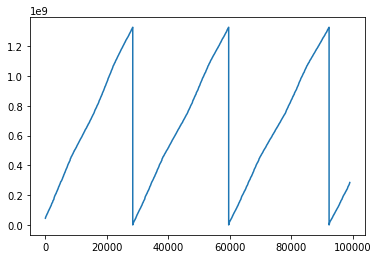

In [156]:
import matplotlib.pyplot as plt
plt.plot(events_train[1000:100000,t_index])

In [170]:
print(np.random.rand(10).astype(int))

[0 0 0 0 0 0 0 0 0 0]
